# 関数などの準備

In [1]:
import matplotlib.pyplot as plt

In [2]:
def plot_train_val_loss(history):
    """エポックごとの損失の可視化"""
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

In [3]:
def plot_train_val_acc(history):
    """エポックごとのAccuracyの可視化"""
    train_acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.legend()

    plt.show()

# データの準備

In [4]:
from keras.datasets import mnist

(X_trainval, y_trainval), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, random_state=0)

In [6]:
X_train.shape, X_val.shape, X_test.shape

((45000, 28, 28), (15000, 28, 28), (10000, 28, 28))

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_val = X_val.reshape((X_val.shape[0], 28 * 28))
X_val = X_val.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

In [8]:
X_train.shape, X_val.shape, X_test.shape

((45000, 784), (15000, 784), (10000, 784))

In [9]:
y_train.shape, y_val.shape, y_test.shape

((45000,), (15000,), (10000,))

In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [11]:
y_train.shape, y_val.shape, y_test.shape

((45000, 10), (15000, 10), (10000, 10))

# モデルの構築

In [12]:
from keras import layers, models
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop


def build_model(layer1_units, layer2_units):
    """4層でいろいろ試す"""
    input_shape = (28 * 28,)
    model = models.Sequential()

    model.add(layers.Dense(layer1_units,
                           activation="relu", input_shape=input_shape))
    model.add(layers.Dense(layer2_units, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))

    model.compile(optimizer=RMSprop(),
                  loss=categorical_crossentropy,
                  metrics=["accuracy"])

    return model

# モデルの訓練

## めちゃめちゃ単純な層

In [13]:
model = build_model(layer1_units=2, layer2_units=3)

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    verbose=1)

W0709 19:20:55.530011 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 19:20:55.542117 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 19:20:55.544206 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 19:20:55.581449 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-package

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 1s 29us/step - loss: 1.7180 - acc: 0.4019 - val_loss: 1.4054 - val_acc: 0.5455
Epoch 2/20
45000/45000 [==============================] - 1s 23us/step - loss: 1.3031 - acc: 0.5677 - val_loss: 1.2412 - val_acc: 0.5794
Epoch 3/20
45000/45000 [==============================] - 1s 23us/step - loss: 1.2038 - acc: 0.6036 - val_loss: 1.1844 - val_acc: 0.6183
Epoch 4/20
45000/45000 [==============================] - 1s 22us/step - loss: 1.1541 - acc: 0.6192 - val_loss: 1.1362 - val_acc: 0.6201
Epoch 5/20
45000/45000 [==============================] - 1s 23us/step - loss: 1.1201 - acc: 0.6280 - val_loss: 1.1147 - val_acc: 0.6288
Epoch 6/20
45000/45000 [==============================] - 1s 22us/step - loss: 1.0956 - acc: 0.6349 - val_loss: 1.0869 - val_acc: 0.6396
Epoch 7/20
45000/45000 [==============================] - 1s 22us/step - loss: 1.0746 - acc: 0.6445 - val_loss: 1.0660 - val_acc

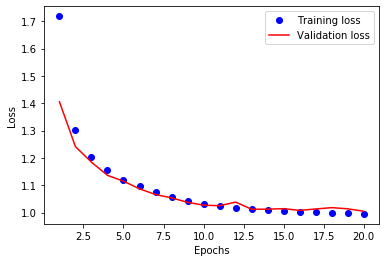

In [14]:
# 可視化
plot_train_val_loss(history)

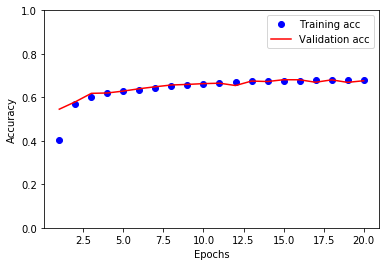

In [15]:
plot_train_val_acc(history)

## モデルの表現力を高める

In [16]:
model = build_model(layer1_units=16, layer2_units=8)

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 1s 28us/step - loss: 0.6519 - acc: 0.8086 - val_loss: 0.3553 - val_acc: 0.8941
Epoch 2/20
45000/45000 [==============================] - 1s 23us/step - loss: 0.3097 - acc: 0.9127 - val_loss: 0.2781 - val_acc: 0.9200
Epoch 3/20
45000/45000 [==============================] - 1s 23us/step - loss: 0.2546 - acc: 0.9276 - val_loss: 0.2526 - val_acc: 0.9257
Epoch 4/20
45000/45000 [==============================] - 1s 33us/step - loss: 0.2262 - acc: 0.9354 - val_loss: 0.2371 - val_acc: 0.9317
Epoch 5/20
45000/45000 [==============================] - 1s 32us/step - loss: 0.2088 - acc: 0.9404 - val_loss: 0.2220 - val_acc: 0.9372
Epoch 6/20
45000/45000 [==============================] - 1s 26us/step - loss: 0.1965 - acc: 0.9433 - val_loss: 0.2224 - val_acc: 0.9356
Epoch 7/20
45000/45000 [==============================] - 1s 26us/step - loss: 0.1860 - acc: 0.9461 - val_loss: 0.2176 - val_acc

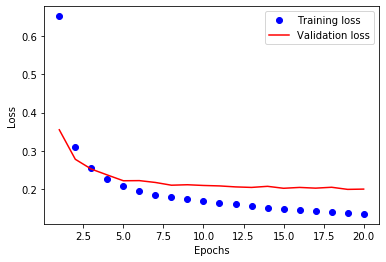

In [17]:
plot_train_val_loss(history)

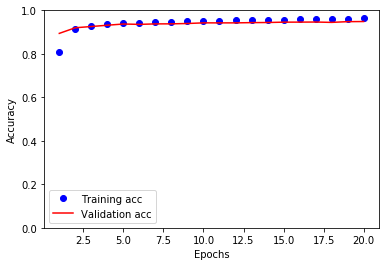

In [18]:
plot_train_val_acc(history)

## さらにモデルの表現力を高める

In [19]:
model = build_model(layer1_units=64, layer2_units=64)

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 2s 38us/step - loss: 0.3167 - acc: 0.9082 - val_loss: 0.1941 - val_acc: 0.9415
Epoch 2/20
45000/45000 [==============================] - 2s 35us/step - loss: 0.1500 - acc: 0.9553 - val_loss: 0.1461 - val_acc: 0.9575
Epoch 3/20
45000/45000 [==============================] - 2s 34us/step - loss: 0.1103 - acc: 0.9668 - val_loss: 0.1275 - val_acc: 0.9643
Epoch 4/20
45000/45000 [==============================] - 2s 36us/step - loss: 0.0894 - acc: 0.9729 - val_loss: 0.1197 - val_acc: 0.9667
Epoch 5/20
45000/45000 [==============================] - 2s 39us/step - loss: 0.0761 - acc: 0.9776 - val_loss: 0.1259 - val_acc: 0.9663
Epoch 6/20
45000/45000 [==============================] - 2s 37us/step - loss: 0.0654 - acc: 0.9807 - val_loss: 0.1186 - val_acc: 0.9699
Epoch 7/20
45000/45000 [==============================] - 2s 42us/step - loss: 0.0569 - acc: 0.9837 - val_loss: 0.1201 - val_acc

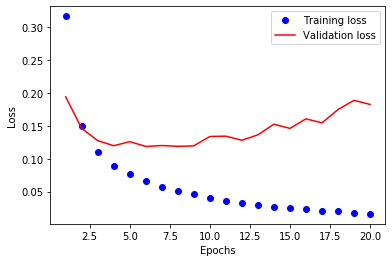

In [20]:
plot_train_val_loss(history)

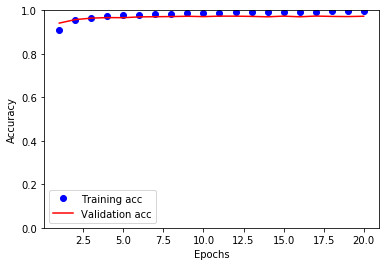

In [21]:
plot_train_val_acc(history)

# バッチサイズ

In [22]:
model = build_model(layer1_units=64, layer2_units=32)

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 1s 14us/step - loss: 0.5506 - acc: 0.8533 - val_loss: 0.2810 - val_acc: 0.9197
Epoch 2/20
45000/45000 [==============================] - 0s 8us/step - loss: 0.2392 - acc: 0.9299 - val_loss: 0.2179 - val_acc: 0.9384
Epoch 3/20
45000/45000 [==============================] - 0s 8us/step - loss: 0.1849 - acc: 0.9458 - val_loss: 0.1868 - val_acc: 0.9457
Epoch 4/20
45000/45000 [==============================] - 0s 7us/step - loss: 0.1524 - acc: 0.9560 - val_loss: 0.1630 - val_acc: 0.9519
Epoch 5/20
45000/45000 [==============================] - 0s 8us/step - loss: 0.1302 - acc: 0.9623 - val_loss: 0.1476 - val_acc: 0.9587
Epoch 6/20
45000/45000 [==============================] - 0s 8us/step - loss: 0.1130 - acc: 0.9666 - val_loss: 0.1378 - val_acc: 0.9611
Epoch 7/20
45000/45000 [==============================] - 0s 8us/step - loss: 0.0995 - acc: 0.9705 - val_loss: 0.1211 - val_acc: 0.96

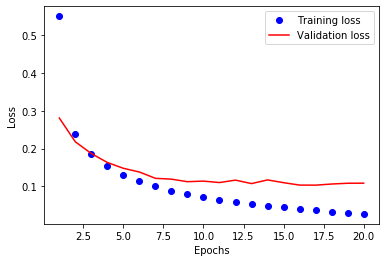

In [23]:
plot_train_val_loss(history)

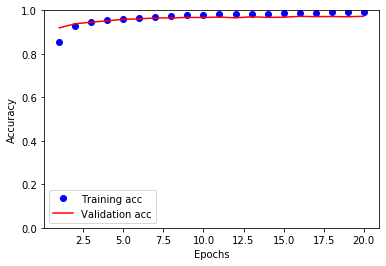

In [24]:
plot_train_val_acc(history)